In [258]:
import seaborn as sns 
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np
import warnings
import requests
warnings.filterwarnings("ignore")

# Data

In [146]:
# Load mpg data from sns
cars = sns.load_dataset('mpg')
cars.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


## 1) Matplotlib

## 2) Seaborn

In [147]:
import seaborn  as sns
# Set the standard theme
sns.set_theme() 

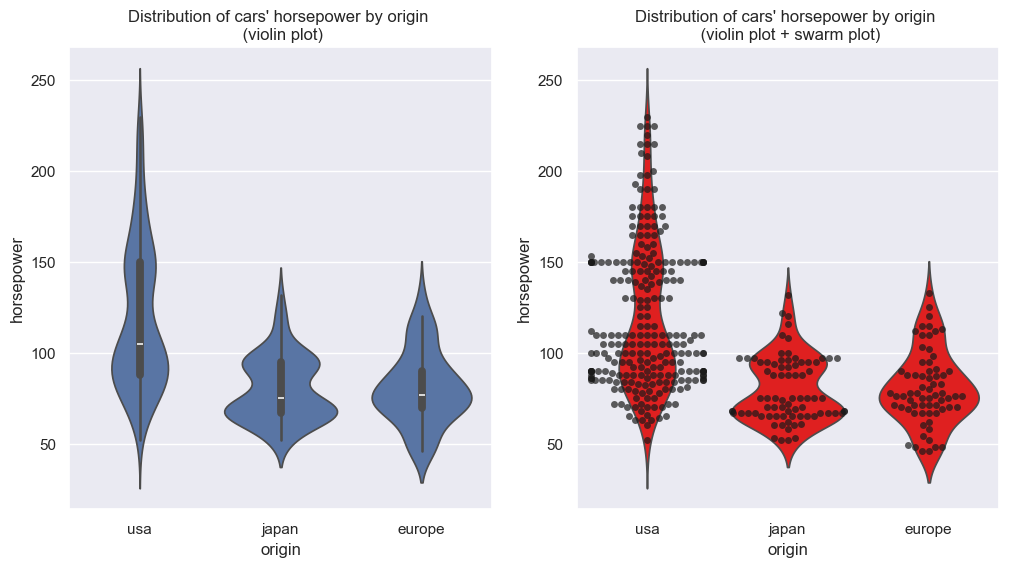

In [148]:
# Violin and swarm plots
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.violinplot(x="origin", y="horsepower", data=cars)
plt.title("Distribution of cars' horsepower by origin \n (violin plot)")
plt.subplot(1,2,2)
sns.violinplot(x="origin", y="horsepower", data=cars, inner=None, color="red")
sns.swarmplot(x="origin", y="horsepower", data=cars, color="k", alpha=0.7)
plt.title("Distribution of cars' horsepower by origin \n (violin plot + swarm plot)")
plt.show()

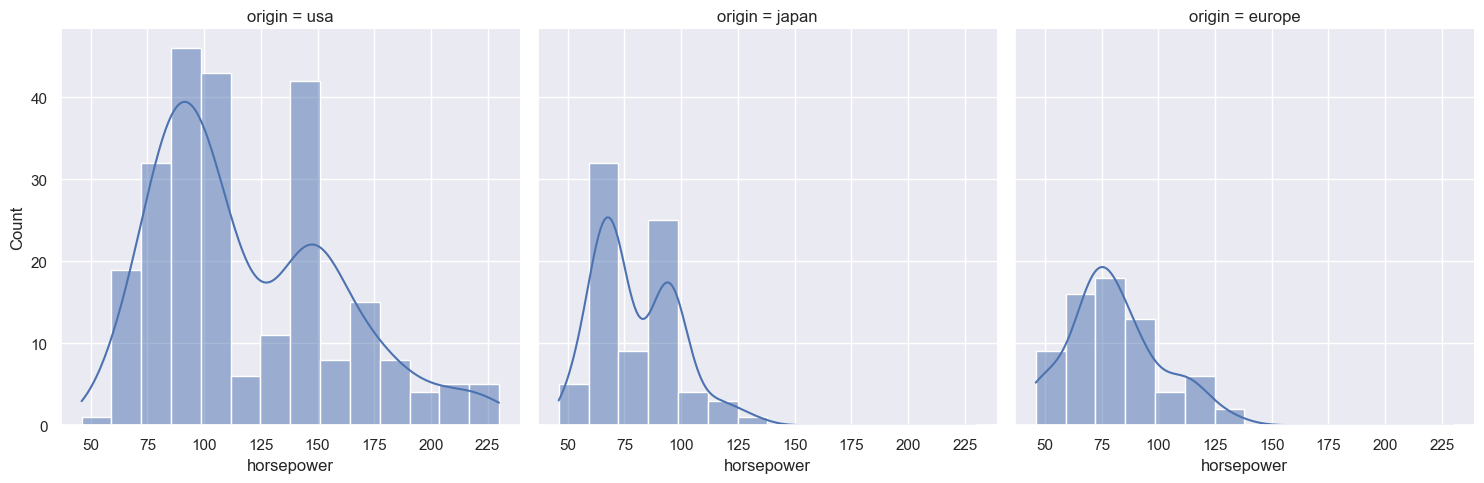

In [149]:
# Histograms with density estimate plots
sns.displot(data=cars, x="horsepower", col="origin", kde=True)
plt.show()

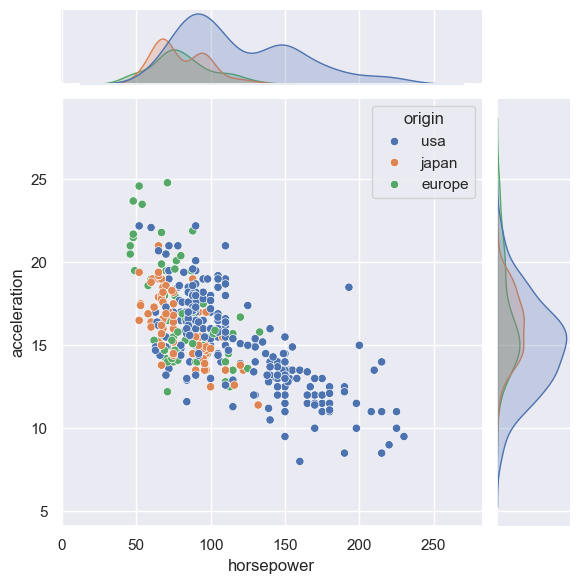

In [150]:
# Joint distribution scatter plot with density estimates
sns.jointplot(data=cars, x="horsepower", y="acceleration", hue="origin")
plt.show()

## 3) GGplot

## 4) Bokeh

In [151]:
from bokeh.plotting import figure, show
from bokeh.io import output_notebook # to plots inline in a classic Jupyter notebook
output_notebook() 

Loading BokehJS ...

In [152]:
# Scatter plot of horsepower against acceleration
p = figure(width=400, height=400,  title="Horsepower against acceleration")
p.title.text_color = "red"
p.title.text_font_style = "italic"
p.yaxis.axis_label = "Acceleration"
p.xaxis.axis_label = "Horsepower"
p.scatter(cars["horsepower"], cars["acceleration"], size=10, fill_color ='orange')
show(p)

In [153]:
# Histogram of acceleration
hist, edges = np.histogram(cars['acceleration'], density=True, bins=30)
p = figure(title="Acceleration", background_fill_color="#fafafa", toolbar_location="below")
p.quad(top=hist, bottom=0, left=edges[:-1], right=edges[1:],
        fill_color="green", line_color="white", alpha=0.5)
p.xaxis.axis_label = 'Acceleration'
p.yaxis.axis_label = 'Density'
p.grid.grid_line_color="white"
show(p)

In [154]:
# Boxplot of gas consumption mpg categorized by country of origin
from bokeh.models import ColumnDataSource, Whisker
from bokeh.models import Range1d
from bokeh.transform import factor_cmap

cars_sub = cars[["origin", "mpg"]].dropna()
cars_sub = cars_sub[cars_sub['mpg'] > 0]
origins = cars_sub.origin.unique()

# compute quantiles
qs = cars_sub.groupby("origin").mpg.quantile([0.25, 0.5, 0.75])
qs = qs.unstack().reset_index()
qs.columns = ["origin", "q1", "q2", "q3"]
cars_sub = pd.merge(cars_sub, qs, on="origin", how="left")

# compute IQR outlier bounds
iqr = cars_sub.q3 - cars_sub.q1
cars_sub["upper"] = cars_sub.q3 + 1.5*iqr
cars_sub["lower"] = cars_sub.q1 - 1.5*iqr

source = ColumnDataSource(cars_sub)

p = figure(x_range=origins, toolbar_location='below',
           title="mpg",
           background_fill_color="#eaefef", y_axis_label="mpg")

# outlier range
whisker = Whisker(base="origin", upper="upper", lower="lower", source=source)
whisker.upper_head.size = whisker.lower_head.size = 20
p.add_layout(whisker)

# quantile boxes
cmap = factor_cmap("origin", "TolRainbow7", origins)
p.vbar("origin", 0.7, "q2", "q3", source=source, color=cmap, line_color="black")
p.vbar("origin", 0.7, "q1", "q2", source=source, color=cmap, line_color="black")

# outliers
outliers = cars_sub[~cars_sub.mpg.between(cars_sub.lower, cars_sub.upper)]
p.scatter("origin", "mpg", source=outliers, size=6, color="black", alpha=0.3)

# Set y axis range
p.y_range = Range1d(0,50)
p.xgrid.grid_line_color = None
p.axis.major_label_text_font_size="14px"
p.axis.axis_label_text_font_size="12px"
show(p)

## 6) Plotly

In [156]:
import plotly.express as px
# Calculate mpg mean by origin
cars_g = cars.groupby('origin').agg({"mpg": 'mean'})

# Create a bar plot
fig = px.bar(x=cars_g.index, y=cars_g['mpg'], title="mpg (mean) by origin")
fig.update_layout(xaxis_title='Origin', yaxis_title = 'mpg')
fig.show()

In [167]:
# Scatter plot of displacement vs horsepower
fig = px.scatter(cars, x="displacement", y="horsepower", color="origin",
                 size='cylinders' )
fig.update_layout(title_text='Horsepower vs Displacement', title_x=0.5)

fig.show()

In [163]:
# Create 3D scatter plot displacement vs cylinders vs horsepower
fig = px.scatter_3d(cars, 
                    x=cars['displacement'], 
                    y=cars['cylinders'], 
                    z= cars['horsepower'],
                    color='origin', 
                    width=800, 
                    height=600)

# Update layout and add labels for axis
fig.update_layout(scene=dict(
                    xaxis_title='displacement',
                    yaxis_title='cylinders',
                    zaxis_title='horsepower'))

# Show plot
fig.show()

# 7) 

# 8) Leather

In [234]:
import leather
from IPython.display import SVG

In [239]:
# Prepare the data in a format that leather can use for a scatter plot
horsepower_acceleration  = [[i,j] for i,j in zip(cars['horsepower'], cars['acceleration'])] 
horsepower_acceleration[:5]

[[130.0, 12.0], [165.0, 11.5], [150.0, 11.0], [150.0, 12.0], [140.0, 10.5]]

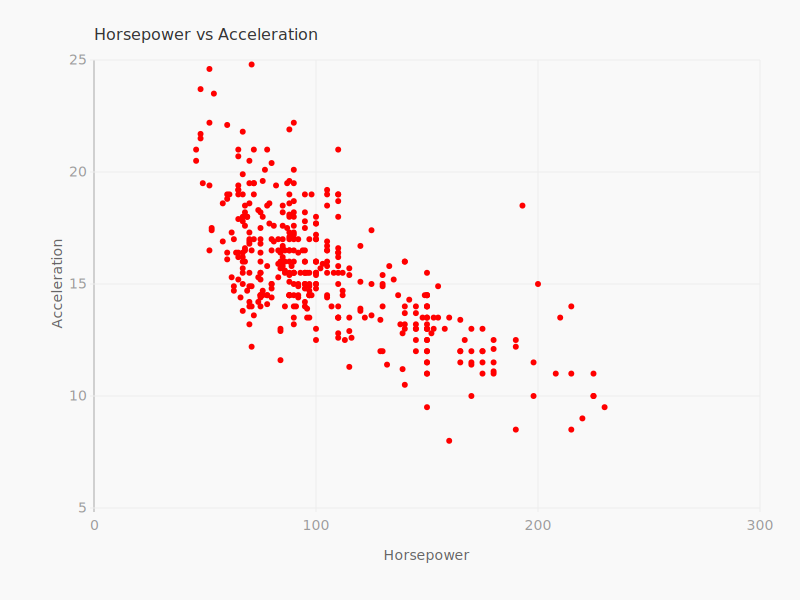

In [236]:
# Scatter plot of horsepower against acceleration
chart = leather.Chart('Horsepower vs Acceleration')
chart.add_dots( horsepower_acceleration, fill_color='red' )
chart.add_y_axis(name = 'Acceleration')
chart.add_x_axis(name = 'Horsepower')
chart.to_svg('outputs/charts/horsepowerVS_acceleration.svg')  # By default leather saves plots as svg

# Display the SVG file inline
SVG(filename='outputs/charts/horsepowerVS_acceleration.svg')

In [237]:
# Prepare the data in a format that leather can use for a bar plot
horsepower_by_origin = cars.groupby('origin').agg({"horsepower": "mean"}).reset_index()
horsepower_by_origin = [[j,i] for i,j in zip(horsepower_by_origin['origin'], horsepower_by_origin['horsepower'])] 
horsepower_by_origin

[[80.55882352941177, 'europe'],
 [79.83544303797468, 'japan'],
 [119.04897959183674, 'usa']]

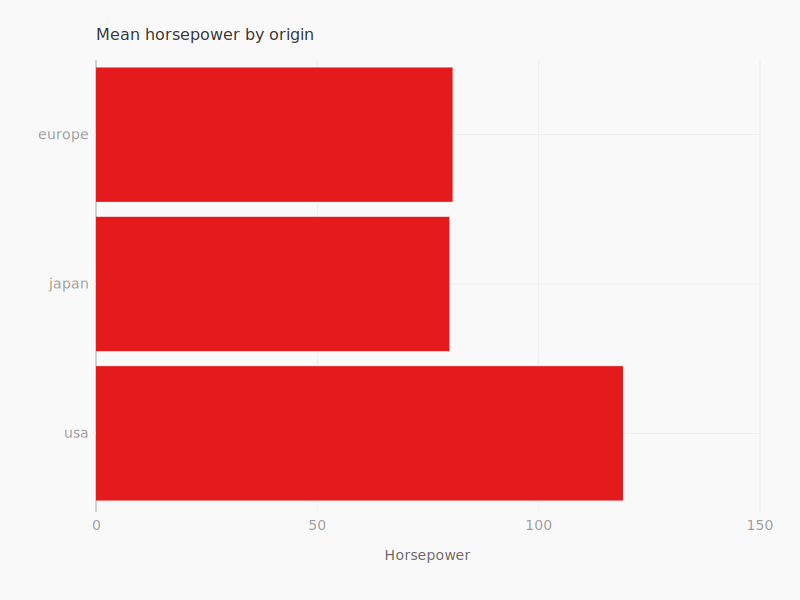

In [238]:
# Bar plot of horsepower by origin
chart = leather.Chart('Mean horsepower by origin')
chart.add_bars(horsepower_by_origin)
chart.add_x_axis(name = 'Horsepower')
chart.to_svg('outputs/charts/bars_horsepower.svg')

# Display the SVG file inline
SVG(filename='outputs/charts/bars_horsepower.svg')

# 9) 

# 10) Folium 

In [244]:
from folium import  branca
import folium

In [259]:
# Plot Europe map  
map = folium.Map([46, 3], tiles="OpenStreetMap", zoom_start=5)  # zoom 5x
map

In [261]:
# USA map with state colored by unemployment rate
state_geo = requests.get(
    "https://raw.githubusercontent.com/python-visualization/folium-example-data/main/us_states.json"
).json()
state_data = pd.read_csv(
    "https://raw.githubusercontent.com/python-visualization/folium-example-data/main/us_unemployment_oct_2012.csv"
)

m = folium.Map(location=[48, -102], zoom_start=3)
folium.Choropleth(
    geo_data=state_geo,
    name="choropleth",
    data=state_data,
    columns=["State", "Unemployment"],
    key_on="feature.id",
    fill_color="YlGn",
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="Unemployment Rate (%)",
).add_to(m)

folium.LayerControl().add_to(m)
m